## Some ETL Related Tests

In [22]:
import pandas as pd

In [40]:
from functools import reduce

In [16]:
import os

In [241]:
import datetime
import matplotlib.pyplot as plt

### Load Files

In [26]:
workdir = '/tmp/rideindego'
data_files = os.listdir(workdir)

In [29]:
csv_files = [os.path.join(workdir,i) for i in data_files if i.endswith('.csv')]

In [30]:
csv_files

['/tmp/rideindego/indego-trips-2018-q4.csv',
 '/tmp/rideindego/Q3_2016_trips.csv',
 '/tmp/rideindego/indego-trips-2018-q3.csv',
 '/tmp/rideindego/indego-trips-2018-q2.csv',
 '/tmp/rideindego/indego-trips-2018-q1.csv',
 '/tmp/rideindego/indego-quarter-echo.bicycletransit.com-2018-01-19-9-57 AM.csv',
 '/tmp/rideindego/indego_gbfs_trips_Q1_2017.csv',
 '/tmp/rideindego/Indego_trips_Q4_2016.csv',
 '/tmp/rideindego/indego-trips-2017-q3.csv',
 '/tmp/rideindego/indego-trips-2019-q1.csv',
 '/tmp/rideindego/Indego_Trips_2016Q1.csv',
 '/tmp/rideindego/Indego_Trips_2016Q2.csv',
 '/tmp/rideindego/indego_gbfs_trips_Q2_2017.csv',
 '/tmp/rideindego/Indego_Trips_2015Q4.csv',
 '/tmp/rideindego/Indego_Trips_2015Q3.csv',
 '/tmp/rideindego/Indego_Trips_2015Q2.csv']

In [31]:
df_all = pd.DataFrame()

In [33]:
df_array = [pd.read_csv(csv_file) for csv_file in csv_files]

/Users/leima/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Validate imported data

In [64]:
for i in df_array:
    print('columns:', len(i.columns), '; index:', i.index, '; length:', len(i))

columns: 15 ; index: RangeIndex(start=0, stop=142872, step=1) ; length: 142872
columns: 14 ; index: RangeIndex(start=0, stop=234946, step=1) ; length: 234946
columns: 15 ; index: RangeIndex(start=0, stop=228329, step=1) ; length: 228329
columns: 14 ; index: RangeIndex(start=0, stop=201624, step=1) ; length: 201624
columns: 14 ; index: RangeIndex(start=0, stop=98993, step=1) ; length: 98993
columns: 14 ; index: RangeIndex(start=0, stop=183909, step=1) ; length: 183909
columns: 14 ; index: RangeIndex(start=0, stop=107772, step=1) ; length: 107772
columns: 14 ; index: RangeIndex(start=0, stop=176119, step=1) ; length: 176119
columns: 14 ; index: RangeIndex(start=0, stop=276785, step=1) ; length: 276785
columns: 15 ; index: RangeIndex(start=0, stop=96593, step=1) ; length: 96593
columns: 14 ; index: RangeIndex(start=0, stop=73169, step=1) ; length: 73169
columns: 14 ; index: RangeIndex(start=0, stop=170824, step=1) ; length: 170824
columns: 14 ; index: RangeIndex(start=0, stop=220441, step

In [65]:
df_array[0].columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type'],
      dtype='object')

In [66]:
df_array[1].columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

In [70]:
df_array[0].head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,299955254,30,2018-10-01 00:03:00,2018-10-01 00:33:00,3038,39.947811,-75.194092,3063,39.947811,-75.194092,11908,30,One Way,Indego30,standard
1,299955253,7,2018-10-01 00:06:00,2018-10-01 00:13:00,3032,39.945271,-75.179710,3064,39.945271,-75.179710,5382,30,One Way,Indego30,standard


In [71]:
df_array[1].head(2)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,25183529,240,7/1/2016 0:07,7/1/2016 0:11,3063,39.946331,-75.1698,3064,39.9384,-75.173271,3640,30,One Way,Indego30
1,25183528,480,7/1/2016 0:10,7/1/2016 0:18,3124,39.95295,-75.139793,3026,39.94138,-75.145638,3349,30,One Way,Indego30


In [72]:
df_array[2].head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,276039688,17,2018-07-01 00:03:00,2018-07-01 00:20:00,3007,39.945171,-75.159927,3073,39.945171,-75.159927,11913,30,One Way,Indego30,standard
1,276039689,17,2018-07-01 00:03:00,2018-07-01 00:20:00,3007,39.945171,-75.159927,3073,39.945171,-75.159927,3284,30,One Way,Indego30,standard


In [166]:
set(df_array[1].columns) - set(df_array[0].columns)

{'end_station_id', 'start_station_id'}

In [167]:
set(df_array[0].columns) - set(df_array[1].columns)

{'bike_type', 'end_station', 'start_station'}

end_station/start_station and end_station_id/start_station_id are the same thing

In [169]:
df_array = [
    df_temp.rename( columns={'end_station': 'end_station_id', 'start_station': 'start_station_id'} )
    for df_temp in df_array
]

In [170]:
set(df_array[1].columns) - set(df_array[0].columns)

set()

In [171]:
set(df_array[0].columns) - set(df_array[1].columns)

{'bike_type'}

### Check Data Quality

In [172]:
df_all = pd.concat(df_array)

In [173]:
df_all.describe()

,duration,end_station_id,plan_duration,start_station_id,trip_id
count,2.642086e+06,2.642086e+06,2.642086e+06,2.642076e+06,2.642086e+06
mean,6.622166e+02,3.141179e+03,4.487516e+01,3.055939e+03,1.371636e+08
std,2.925911e+03,2.743957e+03,8.046680e+01,2.306821e+02,1.109280e+08
min,1.000000e+00,3.000000e+03,0.000000e+00,3.000000e+03,4.001912e+06
25%,1.100000e+01,3.023000e+03,3.000000e+01,3.023000e+03,4.812222e+06
50%,3.700000e+01,3.046000e+03,3.000000e+01,3.047000e+03,1.292478e+08
75%,6.600000e+02,3.070000e+03,3.000000e+01,3.070000e+03,2.431956e+08
max,8.640000e+04,9.025500e+04,3.650000e+02,9.001800e+04,3.133633e+08


In [174]:
df_all.head(2)

,bike_id,bike_type,duration,end_lat,end_lon,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station_id,start_time,trip_id,trip_route_category
0,11908,standard,30,39.9478,-75.1941,3063,2018-10-01 00:33:00,Indego30,30,39.9478,-75.1941,3038.0,2018-10-01 00:03:00,299955254,One Way
1,5382,standard,7,39.9453,-75.1797,3064,2018-10-01 00:13:00,Indego30,30,39.9453,-75.1797,3032.0,2018-10-01 00:06:00,299955253,One Way


#### Solving bike_type problem

In [175]:
df_all.groupby('bike_type')[['bike_id']].nunique()

,bike_id
bike_type,
electric,19
standard,2808


hmmm I thought they had a hell lot more bikes than this. Anyway, 3000 bikes for Philadelphia is within the reasonable range.

So we have a lot of missing data, which basically confims what we have seen previously. Is it possible that we can create a mapping dictionary to map bike_id to types for the whole dataframe?

In [176]:
print(
    'all unique bike_ids:', df_all.bike_id.nunique(), 
    'unique bike_ids with bike_type:', df_all[~df_all.bike_type.isna()].bike_id.nunique()
)

all unique bike_ids: 3588 unique bike_ids with bike_type: 2826


It is around 80%. Seems to be okay to fill data. Will fill undefined as 'missing'

In [177]:
df_bike_type = df_all[['bike_id', 'bike_type']].drop_duplicates()

In [178]:
df_bike_type.describe()

,bike_id,bike_type
count,4776,2827
unique,3588,2
top,2557,standard
freq,2,2808


In [179]:
df_bike_type.head(2)

,bike_id,bike_type
0,11908,standard
1,5382,standard


In [180]:
df_bike_type.groupby('bike_id').count().sort_values(by = 'bike_type', ascending=False).head(2)

,bike_type
bike_id,
15067,2
02935,1


In [181]:
df_bike_type.drop('15067').groupby('bike_id').count().sort_values(by = 'bike_type', ascending=False).head(2)

,bike_type
bike_id,
15067,2
02935,1


Make the mapping dataframe

In [182]:
# Rerunning this requires the reconstruction of df_bike_type
df_bike_type.set_index('bike_id', inplace=True)
df_bike_type.drop('15067', inplace=True)
df_bike_type[df_bike_type.index == '15067']

,bike_type
bike_id,


In [185]:
df_bike_type.reset_index(inplace=True)
df_all_bike_type_filled = pd.merge( df_all, df_bike_type, how='left', on='bike_id' )

In [ ]:
df_all_bike_type_filled[df_all_bike_type_filled.bike_type_x != df_all_filled.bike_type_y].head(2)

In [ ]:
df_all_bike_type_filled[ ['bike_id', 'bike_type_x', 'bike_type_y'] ].describe()

**Need more work on this. Have to move on. Though maybe important but let's talk about none electric first. None electric seems to be all standard bikes**

Indego introduced electric bikes in q3 of 2019. [Read in this blog post](https://www.rideindego.com/blog/indego-electric-is-back/). So it if safe to assume all bikes were standard bikes if it is not labelled as electric. **So we will fill in the NAs with standard for now.**

In [186]:
df_all['bike_type'] = df_all.bike_type.fillna('standard')

#### Do we have duplications of bike_ids?

In [187]:
# Check for duplications
df_all.groupby('trip_id')[['trip_id']].count().sort_values(by='trip_id', ascending=False).head(2)

,trip_id
trip_id,
4001912,1
202630365,1


#### Understand passholder_type

The name of the passholder’s plan

In [188]:
df_all.groupby('passholder_type').count()

,bike_id,bike_type,duration,end_lat,end_lon,end_station_id,end_time,plan_duration,start_lat,start_lon,start_station_id,start_time,trip_id,trip_route_category
passholder_type,,,,,,,,,,,,,,
Day Pass,89469,89469,89469,87855,87855,89469,89469,89469,89461,89461,89469,89469,89469,89469
Indego30,2070240,2070849,2070849,2059077,2059077,2070849,2070849,2070849,2070698,2070698,2070839,2070849,2070849,2070849
Indego365,125403,125403,125403,123816,123816,125403,125403,125403,125383,125383,125403,125403,125403,125403
IndegoFlex,28788,28820,28820,28671,28671,28820,28820,28820,28819,28819,28820,28820,28820,28820
One Day Pass,6767,6767,6767,6677,6677,6767,6767,6767,6757,6757,6767,6767,6767,6767
Two Day Pass,1603,1603,1603,1594,1594,1603,1603,1603,1603,1603,1603,1603,1603,1603
Walk-up,318906,319175,319175,317103,317103,319175,319175,319175,319174,319174,319175,319175,319175,319175


## We will need date, and time of day separately

In [198]:
df_all['date'] = df_all.start_time.apply(lambda x: x.split(' ')[0] if x else None)

In [200]:
%%timeit
pd.to_datetime(df_all.iloc[0].date)

399 µs ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [202]:
%%timeit
pd.to_datetime(df_all.iloc[0].date, format = '%Y-%m-%d')

300 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [204]:
df_all['date'] = pd.to_datetime(df_all.date)

In [205]:
df_all['hour'] = df_all.start_time.apply(lambda x: int(float(x.split(' ')[-1].split(':')[0])) )

## Duration <= 2017 Q1 are in seconds?

In [220]:
df_all_before_2017q1 = df_all.loc[df_all.date < datetime.date(2017,4,1)]
df_all_after_2017q1 = df_all.loc[df_all.date >= datetime.date(2017,4,1)]

In [221]:
df_all_before_2017q1.duration.median()/60

12.0

In [222]:
df_all_after_2017q1.duration.median()

11.0

In [223]:
df_all_before_2017q1['duration'] = df_all_before_2017q1.duration/60

/Users/leima/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
df_all_clean = pd.concat([df_all_before_2017q1, df_all_after_2017q1])

In [226]:
len(df_all_clean)

2642086

In [227]:
len(df_all)

2642086

## Day of Week Matters

In [232]:
df_all_clean['weekday'] = df_all_clean.date.apply(lambda x: x.weekday())

## Month of Year Matters

In [238]:
df_all_clean['month'] = df_all_clean.date.apply(lambda x: x.month)

In [239]:
df_all_clean['month'].unique()

array([ 7,  8,  9,  1,  2,  3, 10, 11, 12,  4,  5,  6])

## Plan of duration

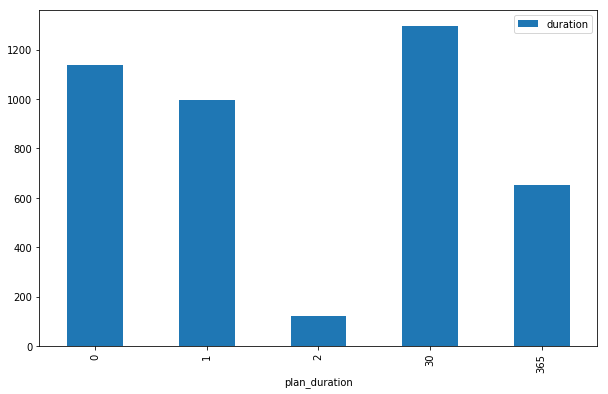

In [245]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_all_clean[df_all_clean.date >= datetime.date(2017,1,1)].groupby('plan_duration')[['duration']].nunique().plot.bar(ax=ax)

In [247]:
df_all_clean[df_all_clean.plan_duration == 2].head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station_id,start_time,trip_id,trip_route_category,date,hour,weekday,month
98318,5206,standard,326.0,39.9505,-75.1729,3023,2017-08-03 15:16:00,Two Day Pass,2,39.9505,-75.1729,3023.0,2017-08-03 09:50:00,159949063,Round Trip,2017-08-03,9,3,8
98447,3666,standard,25.0,39.9646,-75.18,3057,2017-08-03 11:21:00,Two Day Pass,2,39.9614,-75.1524,3073.0,2017-08-03 10:56:00,159857055,One Way,2017-08-03,10,3,8
99041,11775,standard,40.0,39.943,-75.1596,3101,2017-08-03 16:04:00,Two Day Pass,2,39.9646,-75.18,3057.0,2017-08-03 15:24:00,159971668,One Way,2017-08-03,15,3,8
99055,3670,standard,18.0,39.9532,-75.1655,3108,2017-08-03 15:48:00,Two Day Pass,2,39.9501,-75.1447,3046.0,2017-08-03 15:30:00,159948179,One Way,2017-08-03,15,3,8
99060,2572,standard,17.0,39.9532,-75.1655,3108,2017-08-03 15:48:00,Two Day Pass,2,39.9501,-75.1447,3046.0,2017-08-03 15:31:00,159948176,One Way,2017-08-03,15,3,8


So there was two day pass

## Standard Bikes

In [228]:
#df_standard = df_all[~(df_all.bike_type=='electric')]
df_standard = df_all_clean[(df_all_clean.bike_type=='standard')]

In [229]:
df_standard.describe()

,duration,end_station_id,plan_duration,start_station_id,trip_id,hour
count,2.637706e+06,2.637706e+06,2.637706e+06,2.637696e+06,2.637706e+06,2.637706e+06
mean,2.267345e+01,3.141290e+03,4.476082e+01,3.055904e+03,1.368817e+08,1.388234e+01
std,6.822291e+01,2.746232e+03,8.026433e+01,2.308623e+02,1.108039e+08,4.993990e+00
min,1.000000e+00,3.000000e+03,0.000000e+00,3.000000e+03,4.001912e+06,0.000000e+00
25%,8.000000e+00,3.023000e+03,3.000000e+01,3.023000e+03,4.810930e+06,1.000000e+01
50%,1.200000e+01,3.046000e+03,3.000000e+01,3.047000e+03,1.288614e+08,1.500000e+01
75%,1.900000e+01,3.070000e+03,3.000000e+01,3.070000e+03,2.426794e+08,1.800000e+01
max,1.440000e+03,9.025500e+04,3.650000e+02,9.001800e+04,3.133633e+08,2.300000e+01


In [230]:
df_standard.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station_id,start_time,trip_id,trip_route_category,date,hour
0,3640,standard,4.0,39.9384,-75.173271,3064,7/1/2016 0:11,Indego30,30,39.946331,-75.1698,3063.0,7/1/2016 0:07,25183529,One Way,2016-07-01,0
1,3349,standard,8.0,39.94138,-75.145638,3026,7/1/2016 0:18,Indego30,30,39.95295,-75.139793,3124.0,7/1/2016 0:10,25183528,One Way,2016-07-01,0
2,5279,standard,17.0,39.933151,-75.162483,3034,7/1/2016 0:28,Indego30,30,39.93082,-75.174744,3043.0,7/1/2016 0:11,25183527,One Way,2016-07-01,0
3,5198,standard,25.0,39.94138,-75.145638,3026,7/1/2016 0:38,Walk-up,0,39.94138,-75.145638,3026.0,7/1/2016 0:13,25183526,Round Trip,2016-07-01,0
4,3382,standard,45.0,39.947109,-75.166183,3010,7/1/2016 0:58,Walk-up,0,39.954239,-75.161377,3037.0,7/1/2016 0:13,25183525,One Way,2016-07-01,0


In [231]:
df_standard.to_csv('/tmp/tmp.csv', index=False)